Data loading

In [0]:
import numpy as np # linear algebra
import pandas as pd # 


df=pd.read_csv('qs_data.csv')
print(df.shape)
#df=df[:50000]
df.head()


(132271, 4)


,message_code,dch,keyword_id,consumed
0,1000020315,1,921,0
1,100002994,0,1209,0
2,100005246,2,245,0
3,1000061077,2,554,0
4,1000061736,1,708,0


checking data shape and type >>data is looking imbalance

In [0]:
df.shape
df['keyword_id'].nunique()
df['consumed'].value_counts(normalize=True)

0    0.72737
1    0.27263
Name: consumed, dtype: float64

In [0]:
#df['keyword_id'].value_counts().sort_values(ascending=False)

In [0]:
df.dtypes

message_code     int64
dch              int64
keyword_id      object
consumed         int64
dtype: object

Column '**keyword_id **'  have more value seprated by commas.

convert comma seperated value in new column. 

In [0]:
df1 = df['keyword_id'].apply(lambda x: pd.Series(x.split(',')))
df1.rename(columns={0:'var1',1:'var2',2:'var3',3:'var4',4:'var5',5:'var6'},inplace=True)
df1.head(2)

,var1,var2,var3,var4,var5,var6
0,921,NaN,NaN,NaN,NaN,NaN
1,1209,NaN,NaN,NaN,NaN,NaN


imputing nan as 0 value

In [0]:
result = pd.concat([df, df1], axis=1, join_axes=[df.index])
result.head()
result[['var2', 'var3','var4','var5','var6']] = result[['var2', 'var3','var4','var5','var6']].fillna(value=0)
result[['var1','var2','var3','var4','var5','var6']]=result[['var1','var2','var3','var4','var5','var6']].astype(int)
result.dtypes
result.head()

,message_code,dch,keyword_id,consumed,var1,var2,var3,var4,var5,var6
0,1000020315,1,921,0,921,0,0,0,0,0
1,100002994,0,1209,0,1209,0,0,0,0,0
2,100005246,2,245,0,245,0,0,0,0,0
3,1000061077,2,554,0,554,0,0,0,0,0
4,1000061736,1,708,0,708,0,0,0,0,0


In [0]:
result.drop(['message_code','keyword_id'], axis=1,inplace=True)
result.head(1)

,dch,consumed,var1,var2,var3,var4,var5,var6
0,1,0,921,0,0,0,0,0


In [0]:
result.head()
result.dtypes

dch         int64
consumed    int64
var1        int64
var2        int64
var3        int64
var4        int64
var5        int64
var6        int64
dtype: object

distribution of the data so that we can find some intiution 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


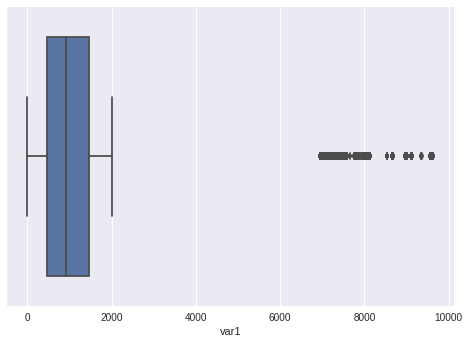

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='var1',data=result,hue='consumed')
dump=result[result['var1']>6000]
#sns.boxplot(x='var1',data=dump,hue='consumed')
#result=result[result['var1']<8000]

36061 96210


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


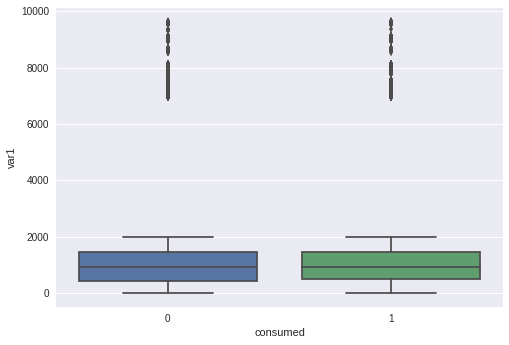

In [0]:
result[result['var1']>6000].count()
pos=result[result['consumed']==1]
neg=result[result['consumed']==0]
print(pos.shape[0], neg.shape[0])
ax1=sns.boxplot(y='var1',data=result,x='consumed')
#ax2=sns.boxplot(x='var1',data=neg,hue='consumed')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


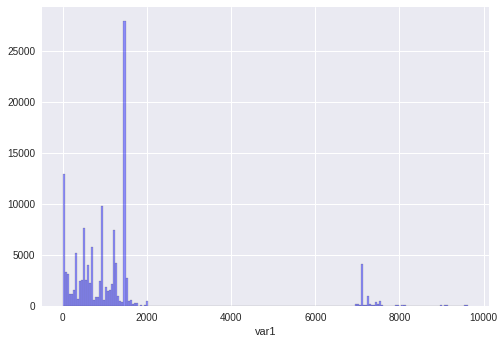

In [0]:
x=result['var1'] 
sns.distplot(result['var1'], hist=True, kde=False, 
             bins=200, color = 'blue',
             hist_kws={'edgecolor':'black'})

#sns.distplot(result['var2'], hist=True, kde=False, bins=200, color = 'blue', hist_kws={'edgecolor':'black'})
#sns.distplot(result['var3'], hist=True, kde=False, bins=200, color = 'blue',hist_kws={'edgecolor':'black'})

In [0]:
result['var1'].value_counts().sort_values(ascending=False)
#print(result[['var1','consumed']].groupby(['var1']).count().sort_values(by='consumed',ascending=False))
pos=result[result['consumed']==1]
neg=result[result['consumed']==0]
#print(pos[['var1','consumed']].groupby(['var1']).count().sort_values(by='consumed',ascending=False))
#print(neg[['var1','consumed']].groupby(['var1']).count().sort_values(by='consumed',ascending=False))

correlation check among the features

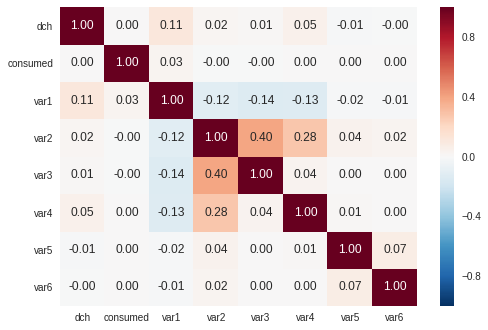

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(result.corr(),annot=True,fmt='0.2f')

setting the data for model building

In [0]:
y=result['consumed']
result.drop(['consumed'], axis=1,inplace=True)
X=result
#X.head()

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=1)

**We can go with different approach to handle the imbalace for the data **

**First can by  using smote based oversampling**

**Second can be by weight sensitive matrix **



### Method1 by Oversampling

In [0]:
from imblearn.over_sampling import SMOTE
## Importing resample
from sklearn.utils import resample


sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [0]:
print('y_train class counts')
print(y_train.value_counts())
print('')
print('y_test class counts')
print(y_test.value_counts())
print('')
print('y_train class counts after oversampling')
print(y_train_res.shape)
print('')

y_train class counts
0    67346
1    25243
Name: consumed, dtype: int64

y_test class counts
0    28864
1    10818
Name: consumed, dtype: int64

y_train class counts after oversampling
(134692,)



Random forest model 

In [0]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
rdmf = RandomForestClassifier( criterion='entropy')
rdmf.fit(X_train_res, y_train_res)
#rdmf_score = rdmf.score(X_test, y_test)
#rdmf_score_tr = rdmf.score(X_train, y_train)
pred = rdmf.predict(X_test)
print(confusion_matrix(y_test, pred))

fpr, tpr, auc_thresholds = roc_curve(y_test, pred)
#print(auc(fpr, tpr))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[14712 14152]
 [ 4874  5944]]


---Classification Report---
              precision    recall  f1-score   support

           0       0.75      0.51      0.61     28864
           1       0.30      0.55      0.38     10818

   micro avg       0.52      0.52      0.52     39682
   macro avg       0.52      0.53      0.50     39682
weighted avg       0.63      0.52      0.55     39682



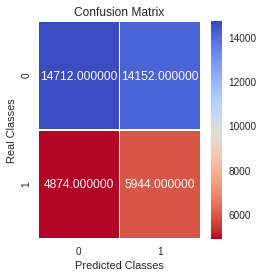

In [0]:
y_test_legit = y_test.value_counts()[0]
y_test_fraud = y_test.value_counts()[1]
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report

def PlotConfusionMatrix(y_test,pred,y_test_legit,y_test_fraud):

    cfn_matrix = confusion_matrix(y_test,pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])
    

    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,fmt='1f',annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    
    print('---Classification Report---')
    print(classification_report(y_test,pred))

PlotConfusionMatrix(y_test,pred,y_test_legit,y_test_fraud)


In [0]:
print('y_train class counts')
print(y_train.value_counts())
print('')
print('y_test class counts')
print(y_test.value_counts())

y_train class counts
0    67346
1    25243
Name: consumed, dtype: int64

y_test class counts
0    28864
1    10818
Name: consumed, dtype: int64


Logistic Regression model 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


---Classification Report---
              precision    recall  f1-score   support

           0       0.73      0.69      0.71     28864
           1       0.29      0.33      0.31     10818

   micro avg       0.59      0.59      0.59     39682
   macro avg       0.51      0.51      0.51     39682
weighted avg       0.61      0.59      0.60     39682



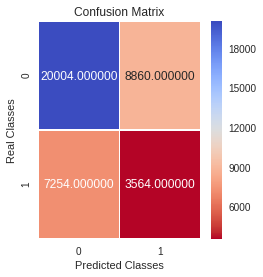

In [0]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_res, y_train_res)

pred = lr_model.predict(X_test)

PlotConfusionMatrix(y_test,pred,y_test_legit,y_test_fraud)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
false_positive_rate, recall, thresholds = roc_curve(y_test, pred)

roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

Model evalution if i am not using any oversampling or wight technique

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
rdmf = RandomForestClassifier( criterion='entropy')
rdmf.fit(X_train, y_train)
rdmf_score = rdmf.score(X_test, y_test)
rdmf_score_tr = rdmf.score(X_train, y_train)

print(rdmf_score_tr)
y_pred = rdmf.predict(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, pred)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7383922496192852


**Model evaluation Without weight model**

[[28378   486]
 [10595   223]]
percision: 0.3145275035260931
recall: 0.02061379182843409
---Classification Report---
              precision    recall  f1-score   support

           0       0.73      0.98      0.84     28864
           1       0.31      0.02      0.04     10818

   micro avg       0.72      0.72      0.72     39682
   macro avg       0.52      0.50      0.44     39682
weighted avg       0.62      0.72      0.62     39682



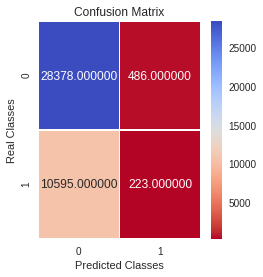

In [0]:
from sklearn.metrics import precision_score,recall_score,f1_score

print(confusion_matrix( y_test,y_pred))
print("percision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
#print("f1 score:", f1_score(y_test, y_pred))

PlotConfusionMatrix(y_test,y_pred,y_test_legit,y_test_fraud)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=1)


### Method 2 Weight sensitive approcah

I am only taking FP and FN  Cost in account. it can be vary as per..
 

In [0]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

def create_cost_df(model, x, y, thresholds):
    results = []
    Amount = 100
    for i in range(len(thresholds)):
        y_pred = model.predict_proba(x)[:,1] > thresholds[i]
        y_pred = 1*y_pred
    
        result_i = pd.DataFrame(
            {
                'Amt': Amount,
                't': y,
                'p': y_pred
            }
        )
        

        result_i["Ca"] = 20
        result_i["Cb"]=1
        result_i["cost"] = result_i.t*( (1 - result_i.p)*result_i.Amt) + (1 - result_i.t)*result_i.Cb
        result_i["recall_score"] = recall_score(y, y_pred)
        result_i["precision_score"] = precision_score(y, y_pred)
        
        result_i = result_i.groupby(['recall_score','precision_score'])['cost'].mean().reset_index()
        result_i['threshold'] = thresholds[i]
        
        results.append(result_i)
    
    results = pd.concat(results, axis=0, ignore_index=True)
    return results

calulationing for various threshold

### according to requirement ( recall or precision) we have to select cost value for the above matrix.

In [0]:
cost_df_rand = create_cost_df(rdmf, X_train, y_train, thresholds)
cost_df_rand

,recall_score,precision_score,cost,threshold
0,0.995959,0.285184,0.837529,0.1
1,0.934675,0.299793,2.508354,0.2
2,0.463416,0.352987,15.356533,0.3
3,0.085925,0.615319,25.648252,0.4
4,0.057442,0.771687,26.424802,0.5
5,0.039773,0.882250,26.906501,0.6
6,0.027414,0.942779,27.243474,0.7
7,0.014658,0.984043,27.591247,0.8
8,0.006180,1.000000,27.822376,0.9


In [0]:
y_test_pred = rdmf.predict_proba(X_test)[:,1] > 0.3
y_test_pred = 1*y_test_pred

y_test_true = y_test
confusion_matrix(y_test_true, y_test_pred)



array([[18955,  9909],
       [ 6515,  4303]])

same can be calculate for other classifier model

In [0]:
cost_df_lr = create_cost_df(lr_model, X, y, thresholds)
cost_df_rand

**for above models Feature Engineering, Hyperparament tuning and Weight parameter selction will definetely improve accuracy , due to some time constraint i am leaving that part.**

** Request you to consider the approach.**

## Thanks